In [6]:
import numpy
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.Grayscale(),
    torchvision.transforms.v2.Resize((32, 32))
])

train = torchvision.datasets.ImageFolder(
    '../experiments/labeled_faces_in_the_wild/lfw/training',
    transform = transform
)
train_images = numpy.array([ train[i][0] for i in range(40) ]) / 255
train_labels = numpy.array([ train[i][1] for i in range(40) ])

test = torchvision.datasets.ImageFolder(
    '../experiments/labeled_faces_in_the_wild/lfw/testing',
    transform = transform
)
test_images = numpy.array([ test[i][0] for i in range(4, 14) ]) / 255
test_labels = numpy.array([ test[i][1] for i in range(4, 14) ])

In [7]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(
    n_jobs = 1,
    binarizer_thresholds = [ 0.4 ],
    num_radial_filtrations = 2
)
train_features = extractor.fit_transform(train_images, "train")
test_features = extractor.transform(test_images, "test")

Calculating inverted images
GreyscaleExtractor: processing train/greyscale, do_fit = True
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./train/greyscale/features.npy
GreyscaleExtractor: processing train/greyscale, do_fit = False
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/greyscale/features.npy
GreyscaleExtractor: processing train/inverted_greyscale, do_fit = True
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./train/inverted_greyscale/features.npy
GreyscaleExtractor: processing train/inverted_greyscale, do_fit = False
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/features.npy
Fitting filtrations
Calc

In [8]:
extractor = cvtda.topology.FeatureExtractor(
    n_jobs = 1,
    return_diagrams = True,
    only_get_from_dump = True,
    binarizer_thresholds = [ 0.4 ],
    num_radial_filtrations = 2
)
train_diagrams = extractor.fit_transform(train_images, "train")
test_diagrams = extractor.transform(test_images, "test")

Calculating inverted images
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtrations
Calculated radial centers for images of size 32x32: [10 21]x[10 21]
Fitting filtration 1/12: 4/HeightFiltrartion_-1_-1
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/12: 4/HeightFiltrartion_1_1
Got the result from ./train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/12: 4/HeightFiltrartion_1_-1
Got the result from ./train/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence d

Dataset: processing diagrams: 100%|██████████| 14/14 [00:00<00:00, 147.13it/s]


Constructed a dataset of 40 images of shape torch.Size([1, 32, 32]) with 28 diagrams and 4185 features


Dataset: processing diagrams: 100%|██████████| 14/14 [00:00<00:00, 530.98it/s]


Constructed a dataset of 10 images of shape torch.Size([1, 32, 32]) with 28 diagrams and 4185 features
Trying SimpleTopologicalLearner - <cvtda.face_recognition.SimpleTopologicalLearner.SimpleTopologicalLearner object at 0x15e49c310>


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 1171.51it/s]


Trying DiagramsLearner - <cvtda.face_recognition.DiagramsLearner.DiagramsLearner object at 0x322bf7250>


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 1981.89it/s]
/opt/homebrew/lib/python3.10/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x322bf5720>
Topology:  False
Images:  torch.Size([32, 1, 32, 32])
Features:  torch.Size([32, 4185])
Parameters: 23519176


NameError: name 'faiss' is not defined

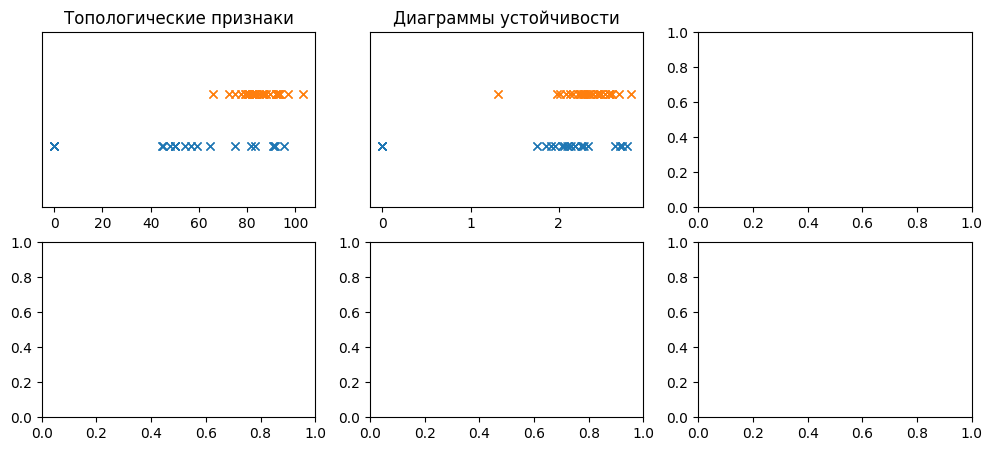

In [9]:
import cvtda.face_recognition
cvtda.face_recognition.learn(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    nn_length_before_new_iter = 5, nn_epochs = 3, nn_device = 'mps'
)